In [1]:
from common import utils, data, models, argbind, viz
import nussl
import torch
import os
from contextlib import contextmanager
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

argbind.ARGS['args.debug'] = True
utils.logger(level='info')

LABELS = ['bass', 'drums', 'other', 'vocals']

@contextmanager
def scope(output_folder, override_args={}):
    with utils.chdir(output_folder):
        args = argbind.load_args('./args.yml')
        for key, val in override_args.items():
            args[key] = val
        with argbind.scope(args):
            yield args

logger <- level=info


10/03/2020 04:57:13 PM | utils.py:27 Switched working directory to ../../../output/musdb18/


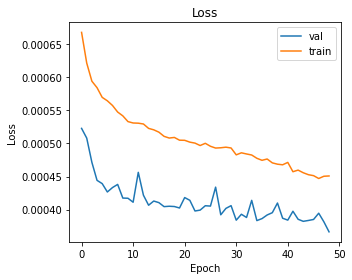

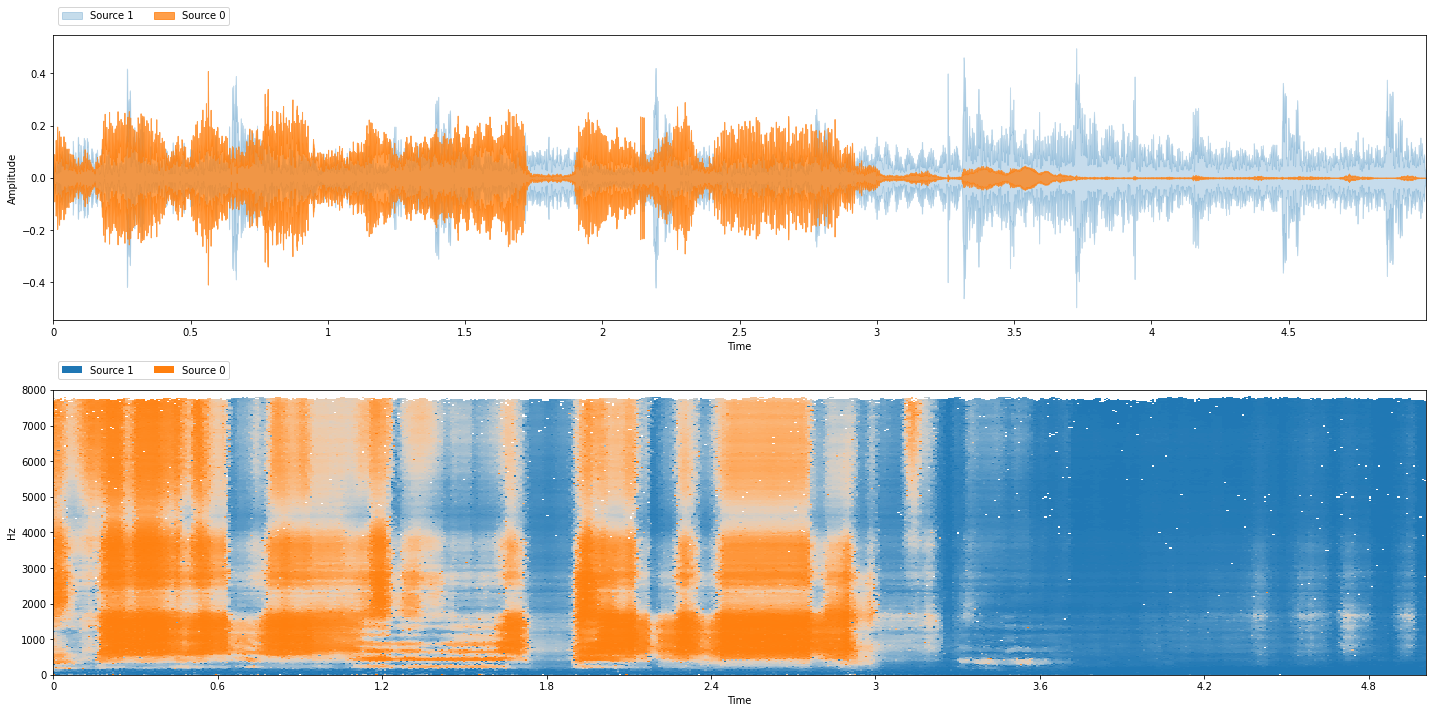


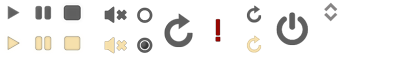
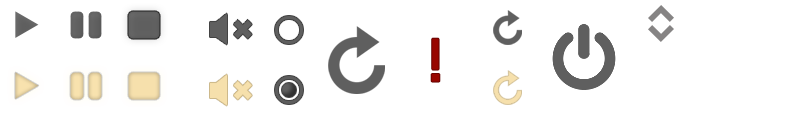
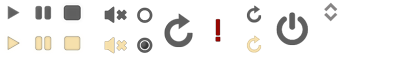

10/03/2020 04:57:21 PM | utils.py:31 Returning to /home/prem/research/tutorial/common/exp/notebooks


In [4]:
overrides = {
    'device.use': 'cpu',
    'deep_mask_estimation.model_path': 'checkpoints/latest.model.pth',
}

with scope('../../../output/musdb18/', overrides) as args:    
    device = utils.device()
    separator = models.deep_mask_estimation(device)
    utils.plot_metrics(separator, 'l1_loss')
    stft_params, sample_rate = data.signal()
    
    with argbind.scope(args, 'train'):
        tfm, new_labels = data.transform(stft_params, sample_rate, 'vocals', True)
        dataset = data.mixer(stft_params, tfm)
        
    item = dataset[np.random.randint(len(dataset))]

    separator.audio_signal = item['mix']
    estimates = separator()
    estimates.append(item['mix'] - estimates[0])
    
    viz.embed(estimates)

In [6]:
with scope('../../../output/musdb18/') as args:    
    device = utils.device()
    separator = models.deep_mask_estimation(device)
    
    def separate(audio):
        sr, data = audio
        mix = nussl.AudioSignal(audio_data_array=data, sample_rate=sr)
        
        separator.audio_signal = mix
        estimates = separator()
        estimates.append(mix - estimates[0])
        
        estimates = {f'Estimate {i}': s for i, s in enumerate(estimates)}
        html = nussl.play_utils.multitrack(estimates, ext='.mp3', display=False)
        
        plt.figure(figsize=(20, 10))
        plt.subplot(211)
        nussl.core.utils.visualize_sources_as_waveform(estimates)
        plt.subplot(212)
        nussl.core.utils.visualize_sources_as_masks(estimates, db_cutoff=-80)
        plt.tight_layout()

        return html, plt

    gr.Interface(
        fn=separate, 
        inputs="audio", 
        outputs=["html", "plot"],
    ).launch(share=True)

10/03/2020 03:54:54 PM | utils.py:27 Switched working directory to ../../../output/musdb18/


Running locally at: http://127.0.0.1:7861/
This share link will expire in 6 hours. If you need a permanent link, email support@gradio.app


10/03/2020 03:54:56 PM | transport.py:1819 Connected (version 2.0, client OpenSSH_7.6p1)
10/03/2020 03:54:57 PM | transport.py:1819 Authentication (publickey) successful!


Running on External URL: https://26516.gradio.app
Interface loading below...


10/03/2020 03:54:59 PM | utils.py:31 Returning to /home/prem/research/tutorial/common/exp/notebooks
10/03/2020 03:55:10 PM | app.py:1891 Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "/home/admin/miniconda3/envs/ismir/lib/python3.8/site-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/home/admin/miniconda3/envs/ismir/lib/python3.8/site-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/home/admin/miniconda3/envs/ismir/lib/python3.8/site-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/home/admin/miniconda3/envs/ismir/lib/python3.8/site-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/home/admin/miniconda3/envs/ismir/lib/python3.8/site-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/home/admin/miniconda3/envs/ismir/lib